##분산 분석 ( ANOVA )
서로 다른 그룹의 평균(또는 산술평균)에서 분산값을 비교하는 데 사용되는 통계 공식입니다. 다양한 시나리오에서 이를 사용하여 서로 다른 그룹의 평균간에 차이가 있는지 확인합니다.

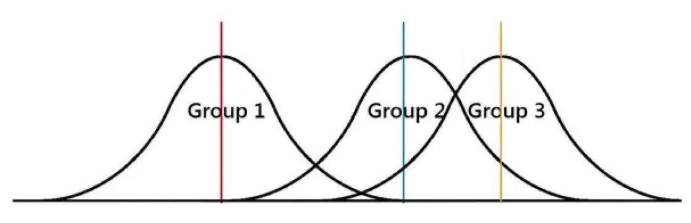

In [ ]:
# 아노바 분석#

In [ ]:
# 파일 불러오기
import pandas as pd
df_ABC = pd.read_csv('/content/drive/MyDrive/산대특 Project/프로젝트 준비/done/group_ABC.csv', index_col=0)
df_ABC

,group,image_Casual,image_Classic,image_Modern,image_Natural,review_Casual,review_Classic,review_Modern,review_Natural,text_Casual,text_Classic,text_Modern,text_Natural,가격,최대_인원수,침실개수,침대개수,욕실개수,score
0,C,28.3,16.3,21.0,34.6,0.0,50.0,25.0,25.0,0.0,33.3,66.7,0.0,98940,4,1.0,1.0,1.0,4.67
1,B_2,47.4,7.8,24.7,20.2,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,59341,4,1.0,1.0,1.0,4.89
2,B_1,9.6,33.2,22.2,34.8,40.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0,219562,5,2.0,1.0,1.0,4.99
3,A,34.2,5.1,52.2,8.7,0.0,20.0,70.0,10.0,0.0,0.0,100.0,0.0,84447,2,1.0,1.0,1.0,4.73
4,B_3,2.2,21.3,30.6,46.0,0.0,25.0,25.0,50.0,0.0,50.0,0.0,50.0,64000,2,1.0,1.0,1.0,4.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,B_1,30.1,21.4,39.7,8.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52951,2,0.0,1.0,1.0,4.65
1726,A,23.1,9.9,59.8,7.2,14.3,0.0,71.4,14.3,0.0,0.0,100.0,0.0,55918,4,1.0,2.0,1.0,4.92
1727,B_3,15.6,15.0,42.7,26.7,9.1,9.1,81.8,0.0,0.0,0.0,0.0,0.0,74177,2,1.0,1.0,1.0,4.83
1728,A,47.4,15.6,6.4,30.7,66.7,0.0,0.0,33.3,0.0,0.0,0.0,0.0,77030,4,1.0,1.0,1.0,4.95


In [ ]:
import pandas as pd
import urllib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
# 분산분석(ANOVA, analysis of variance)

# << Classification of 5 Groups >>

# >> Image  = Text     = Review   : A
# >> Image  = Text    != Review   : B
# >> Image  = Review  != Text     : C
# >> Text   = Review  != Image    : D
# >> Image != Text    != Review   : E


import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


formula = 'score ~ group'
lm = ols(formula, df_ABCDE).fit()
anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
group,4.0,0.209214,0.052303,3.433204,0.008366
Residual,1725.0,26.279685,0.015235,NaN,NaN


##R-square
결정계수는 회귀 모델에서 독립변수가 종속변수를 얼마만큼 설명해 주는지를 가리키는 지표입니다.

<참고>
https://datalabbit.tistory.com/54

In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.433
Date:                Fri, 25 Nov 2022   Prob (F-statistic):            0.00837
Time:                        02:10:53   Log-Likelihood:                 1167.1
No. Observations:                1730   AIC:                            -2324.
Df Residuals:                    1725   BIC:                            -2297.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.8459      0.010    476.013      0.000       4.826       4.866
group[T.B_1]    -0.0074      0.013     -0.592      0.554      -0.032       0.017
group[T.B_2]    -0.0409      0.013     -3.123      0.002      -0.067      -0.015
group[T.B_3]    -0.0173      0.011     -1.520      0.129      -0.040       0.005
group[T.C]      -0.0113      0.012     -0.970      0.332      -0.034       0.012
==============================================================================
Omnibus:                      370.588   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              733.911
Skew:                          -1.261   Prob(JB):                    4.30e-160
Kurtosis:                       4.956   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df_AB = pd.read_csv('/content/drive/MyDrive/산대특 Project/프로젝트 준비/done/group_AB.csv', index_col=0)

In [ ]:
# 아노바 분산 분석 (group2개)

import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

formula = 'score ~ group'
lm = ols(formula, df_AB).fit()
anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
group,1.0,0.003855,0.003855,0.251497,0.616087
Residual,1728.0,26.485044,0.015327,NaN,NaN


In [ ]:
# TEXT 모든 부분 0 값 제거한 data

sum_zero = df_ABC[(df_ABC['text_Casual'] + df_ABC['text_Classic'] + df_ABC['text_Modern'] + df_ABC['text_Natural']).values == 0].index

df_ABC_drop = df_ABC.drop(sum_zero)
df_ABC_drop

In [ ]:
df_AB
sum_zero = df_AB[(df_AB['text_Casual'] + df_AB['text_Classic'] + df_AB['text_Modern'] + df_AB['text_Natural']).values == 0].index

df_AB_drop = df_AB.drop(sum_zero)
# df_AB_drop

In [ ]:
# TEXT 모든 부분 0 값 제거한 data
# 아노바 분산분석 (group 5개)

import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

formula = 'score ~ group'
lm = ols(formula, df_ABC_drop).fit()
anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
group,4.0,0.072894,0.018223,1.245716,0.290316
Residual,608.0,8.894347,0.014629,NaN,NaN


In [ ]:
# TEXT 모든 부분 0 값 제거한 data
# 아노바 분산 분석 (group2개)

import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

formula = 'score ~ group'
lm = ols(formula, df_AB_drop).fit()
anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
group,1.0,0.011932,0.011932,0.814062,0.367278
Residual,611.0,8.955309,0.014657,NaN,NaN


In [ ]:
df_group = df_ABC.groupby('group').mean()
df_g = df_group.iloc[:,:12]
df_s = df_group.iloc[:,-1]
df_new = pd.concat([df_g,df_s], axis=1)

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# # formula = 'score ~ image_Casual+image_Classic+image_Modern+image_Natural+	review_Casual+review_Classic+review_Modern+review_Natural+text_Casual+text_Classic+text_Modern+text_Natural'    # 입력형식 : '종속변수 ~ 독립변수1 + 독립변수2 + 독립변수3...'
formula = 'score ~ group' 
lm = ols(formula, df_ABC).fit()


print(anova_lm(lm))

              df     sum_sq   mean_sq         F    PR(>F)
group        4.0   0.209214  0.052303  3.433204  0.008366
Residual  1725.0  26.279685  0.015235       NaN       NaN


##코사인 유사도(Cosine Similarity)
두 벡터 간의 코사인 각도를 이용하여 구할 수 있는 두 벡터의 유사도를 의미합니다. 두 벡터의 방향이 완전히 동일한 경우에는 1의 값을 가지며, 90°의 각을 이루면 0, 180°로 반대의 방향을 가지면 -1의 값을 갖게 됩니다. 즉, 결국 코사인 유사도는 -1 이상 1 이하의 값을 가지며 값이 1에 가까울수록 유사도가 높다고 판단할 수 있습니다. 이를 직관적으로 이해하면 두 벡터가 가리키는 방향이 얼마나 유사한가를 의미합니다.

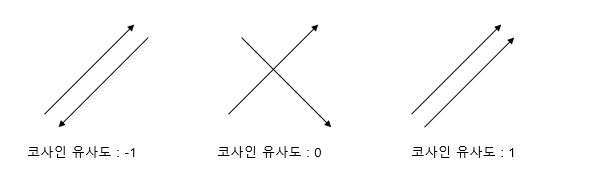

In [ ]:
# cosine similarity 분석을 위한 전처리

image = df_ABC.iloc[:,1:5]
review = df_ABC.iloc[:,5:9]
text = df_ABC.iloc[:,9:13]
score = df_ABC['score']

temp = pd.concat([image, review, text, score], axis=1)

In [ ]:
image.shape, review.shape, text.shape

((1730, 4), (1730, 4), (1730, 4))

In [ ]:
# cosine similarity 분석

import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))


print('image & review similarity :', pd.DataFrame([ cos_sim(image.iloc[idx].values, review.iloc[idx].values)   for idx in range(len(image))]).dropna().mean())      # image & review similarity
print('image & text similarity :', pd.DataFrame([ cos_sim(image.iloc[idx].values, text.iloc[idx].values)   for idx in range(len(image))]).dropna().mean())        # image & text similarity
print('text & review similarity :', pd.DataFrame([ cos_sim(review.iloc[idx].values, text.iloc[idx].values)   for idx in range(len(image))]).dropna().mean())       # text & review similarity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


image & review similarity : 0    0.687275
dtype: float64
image & text similarity : 0    0.523157
dtype: float64
text & review similarity : 0    0.577059
dtype: float64


In [ ]:
#group으로 안묶은거' _ 의미가 없음

formula = 'score ~ image_Casual + image_Classic + image_Modern + image_Natural + review_Casual + review_Classic + review_Modern + review_Natural + text_Casual + text_Classic + text_Modern + text_Natural'
lm = ols(formula, temp).fit()
print(anova_lm(lm))

# 종속변수의 p-value

                    df     sum_sq   mean_sq          F    PR(>F)
image_Casual       1.0   0.034079  0.034079   2.293068  0.130137
image_Classic      1.0   0.021098  0.021098   1.419609  0.233633
image_Modern       1.0   0.101159  0.101159   6.806722  0.009160
image_Natural      1.0   0.001675  0.001675   0.112678  0.737157
review_Casual      1.0   0.200500  0.200500  13.491198  0.000247
review_Classic     1.0   0.005841  0.005841   0.393051  0.530783
review_Modern      1.0   0.242908  0.242908  16.344685  0.000055
review_Natural     1.0   0.186230  0.186230  12.531001  0.000411
text_Casual        1.0   0.015659  0.015659   1.053648  0.304813
text_Classic       1.0   0.024493  0.024493   1.648090  0.199392
text_Modern        1.0   0.001052  0.001052   0.070810  0.790193
text_Natural       1.0   0.136903  0.136903   9.211909  0.002441
Residual        1717.0  25.517302  0.014862        NaN       NaN


# T-test(두 집단간의 평균 차이 확인)

<참고> https://m.blog.naver.com/sendmethere/221333164258

In [ ]:
df_p = pd.read_csv('/content/drive/MyDrive/산대특 Project/프로젝트 준비/plus_final_WLs.csv', index_col=0)

In [ ]:
df_p.groupby(['group'])['평점'].mean()    # Airbnb_plus 평점평균

group
A    4.902833
B    4.894032
C    4.898800
D    4.901734
E    4.901337
Name: 평점, dtype: float64

In [ ]:
df_Ap = df_p[df_p['group'] == 'A']
df_Ep = df_p[df_p['group'] == 'E']

In [ ]:
# T-test 검정

import scipy.stats

scipy.stats.ttest_ind(df_Ap['평점'], df_Ep['평점'], equal_var=False)    # group A, E

Ttest_indResult(statistic=0.3612451620429412, pvalue=0.7179893592440633)